<a href="https://colab.research.google.com/github/sujataprasad01/ML-student-marks-prediction-SVR/blob/main/Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# In this data, we have one independent variable (Feature) "Hours of Study" and one dependet variable (Target) "Marks". You have train a SVR model to understand the relationship between the hours of study and marks of the student to predict the student's marks based on their number of the hours dedicated to studies

# Importing the dataset

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv')

In [ ]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [ ]:
df.tail()

,Hours of Study,Marks
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958
99,25.128485,53.454394


In [ ]:
df.describe()

,Hours of Study,Marks
count,100.000000,100.000000
mean,48.958341,72.035051
std,9.746379,15.200087
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,99.051415


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours of Study  100 non-null    float64
 1   Marks           100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
df.isnull().sum()

Hours of Study    0
Marks             0
dtype: int64

In [ ]:
x=df["Hours of Study"]
y=df["Marks"]

Text(0.5, 1.0, 'Hours of study v/s Marks')

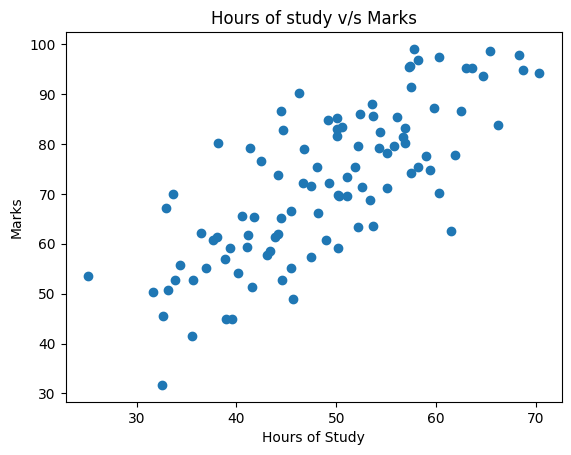

In [ ]:
plt.scatter(x,y)
plt.xlabel('Hours of Study')
plt.ylabel('Marks')
plt.title('Hours of study v/s Marks')

<Axes: >

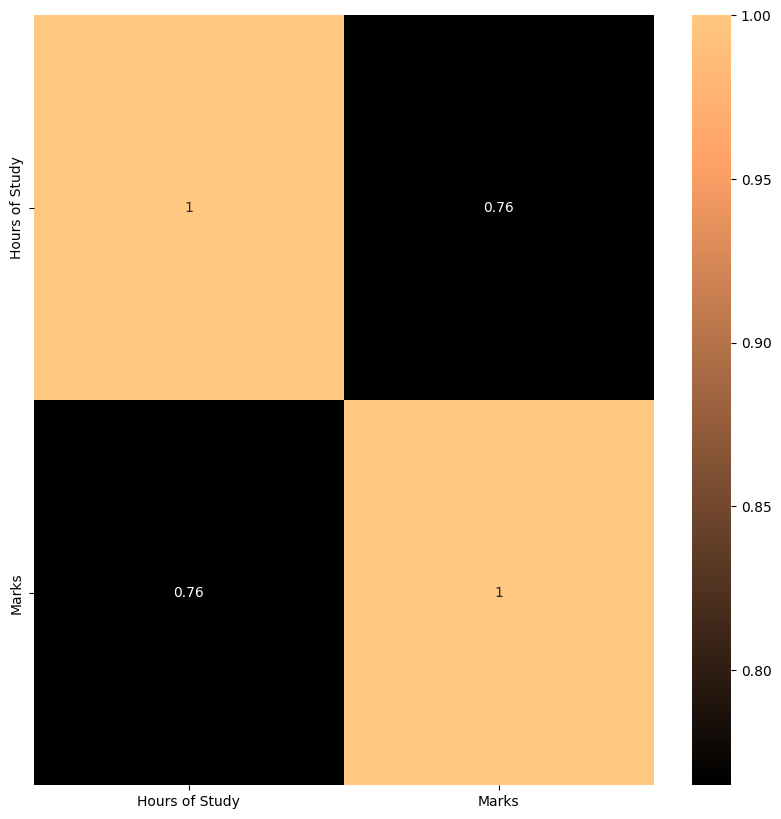

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='copper')

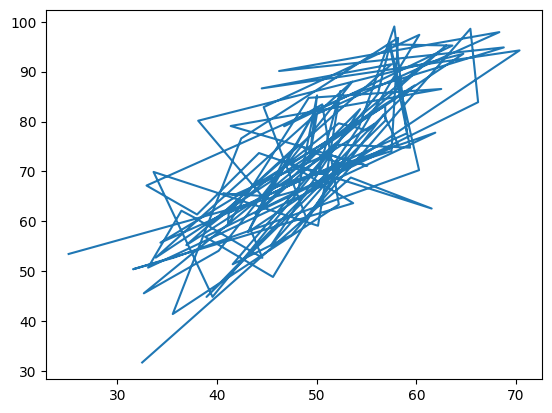

In [ ]:
plt.plot(x,y)

# Feature Scalling

* standarization
* Normalization

In [ ]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.iloc[:,0]
# df.iloc[:,-1]

0     32.502345
1     53.426804
2     61.530358
3     47.475640
4     59.813208
        ...    
95    50.030174
96    49.239765
97    50.039576
98    48.149859
99    25.128485
Name: Hours of Study, Length: 100, dtype: float64

In [ ]:
df.iloc[:,:-1].values

array([[32.50234527],
       [53.42680403],
       [61.53035803],
       [47.47563963],
       [59.81320787],
       [55.14218841],
       [52.21179669],
       [39.29956669],
       [48.10504169],
       [52.55001444],
       [45.41973014],
       [54.35163488],
       [44.1640495 ],
       [58.16847072],
       [56.72720806],
       [48.95588857],
       [44.68719623],
       [60.29732685],
       [45.61864377],
       [38.81681754],
       [66.18981661],
       [65.41605175],
       [47.48120861],
       [41.57564262],
       [51.84518691],
       [59.37082201],
       [57.31000344],
       [63.61556125],
       [46.73761941],
       [50.55676015],
       [52.22399609],
       [35.56783005],
       [42.43647694],
       [58.16454011],
       [57.50444762],
       [45.44053073],
       [61.89622268],
       [33.09383174],
       [36.43600951],
       [37.67565486],
       [44.55560838],
       [43.31828263],
       [50.07314563],
       [43.87061265],
       [62.99748075],
       [32

In [ ]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [ ]:
standscale=StandardScaler()

In [ ]:
X= standscale.fit_transform(X.reshape(-1,1))
Y= standscale.fit_transform(Y.reshape(-1,1))

In [ ]:
X

array([[-1.69692744e+00],
       [ 4.60783817e-01],
       [ 1.29641497e+00],
       [-1.52894871e-01],
       [ 1.11934400e+00],
       [ 6.37672702e-01],
       [ 3.35493359e-01],
       [-9.96004115e-01],
       [-8.79915004e-02],
       [ 3.70370068e-01],
       [-3.64898398e-01],
       [ 5.56151537e-01],
       [-4.94383049e-01],
       [ 9.49740196e-01],
       [ 8.01118494e-01],
       [-2.52939962e-04],
       [-4.40436632e-01],
       [ 1.16926591e+00],
       [-3.44386604e-01],
       [-1.04578477e+00],
       [ 1.77689413e+00],
       [ 1.69710419e+00],
       [-1.52320603e-01],
       [-7.61297225e-01],
       [ 2.97688891e-01],
       [ 1.07372557e+00],
       [ 8.61215827e-01],
       [ 1.51143924e+00],
       [-2.28998849e-01],
       [ 1.64827489e-01],
       [ 3.36751351e-01],
       [-1.38081742e+00],
       [-6.72528769e-01],
       [ 9.49334875e-01],
       [ 8.81266735e-01],
       [-3.62753460e-01],
       [ 1.33414261e+00],
       [-1.63593389e+00],
       [-1.2

# Splitting data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [ ]:
X_train.shape

(80, 1)

# Choosing the model

In [ ]:
from sklearn.svm import SVR

In [ ]:
model=SVR(kernel="rbf")

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
Y_pred=model.predict(X_test)

In [ ]:
Y_pred

array([-0.76947139,  0.62495329, -0.36605346, -1.26283815,  0.57381597,
       -0.1185472 , -0.75664008, -0.40417142, -0.99623181,  0.95262628,
        1.07387222,  0.35030893, -0.56328734, -0.52093818,  0.07543078,
        1.22551728,  1.33758452,  0.67596748, -0.56967027, -0.64786557])

In [ ]:
Y_pred=standscale.inverse_transform(Y_pred.reshape(-1,1))

In [ ]:
Y_pred

array([[60.39764577],
       [81.48677868],
       [66.49889641],
       [52.93601862],
       [80.71338315],
       [70.24215505],
       [60.59170512],
       [65.92240434],
       [56.96814488],
       [86.44247075],
       [88.27618157],
       [77.33308614],
       [63.51595177],
       [64.15643611],
       [73.17585776],
       [90.56964555],
       [92.26453877],
       [82.25831189],
       [63.41941707],
       [62.23679956]])

Text(0.5, 1.0, 'Actual V/s Predicted Marks')

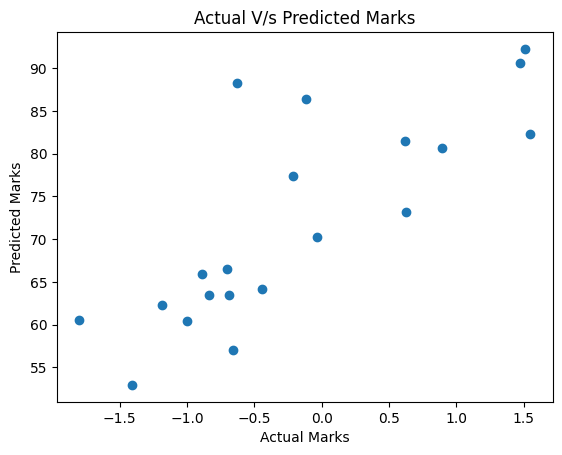

In [ ]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual V/s Predicted Marks")

In [ ]:
standscale.inverse_transform(model.predict([[5]]).reshape(-1,1))

array([[71.50453478]])

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
standscale.inverse_transform(model.score(X_test, Y_test).reshape(-1,1))

array([[81.02328897]])

In [ ]:
standscale.inverse_transform(r2_score(Y_test, Y_pred).reshape(-1,1))

array([[-85642.93805581]])

In [ ]:
mean_squared_error(Y_test, Y_pred)


5328.758968341725

In [ ]:
mean_absolute_error(Y_test, Y_pred)

72.16717964116616